# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [34]:
# Considere a base que você ajustou na lição passada. Carregue-a

base = pd.read_csv("Downloads/base_dummy.csv")
base.head(3)

,Unnamed: 0,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,default_mau
0,1479,0.0,112500.0,-21474.0,-1134.0,1.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,1
1,1480,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1
2,1481,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
# Separe 70% da base para treinamento e 30% para validação

base = base.drop("Unnamed: 0", axis=1)

In [36]:
resultado = base.default_mau
resultado.value_counts()

1    11137
0      268
Name: default_mau, dtype: int64

In [37]:
explicacao = base.drop("default_mau", axis=1)
explicacao.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0.0,112500.0,-21474.0,-1134.0,1.0,0.0,0.0,0.0,2.0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,270000.0,-19110.0,-3051.0,1.0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,130500.0,-10669.0,-1103.0,1.0,0.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,130500.0,-10669.0,-1103.0,1.0,0.0,0.0,0.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(explicacao, resultado, train_size=0.7, random_state=100)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [39]:
# Defina um objeto com a função da árvore de decisão vista em aula

clf = DecisionTreeClassifier(random_state=100)

In [40]:
# Treine o modelo com os dados que você separou para treinamento

clf = clf.fit(X_train, y_train)

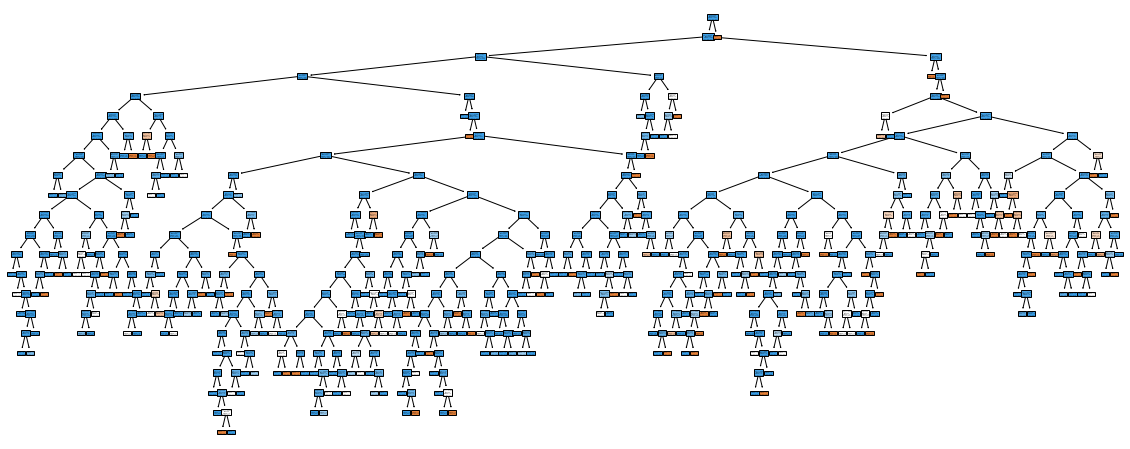

In [41]:
# Visualize a árvore. Talvez você queira aumentar um pouco a figura

plt.figure(figsize=(20, 8))
plot_tree(clf,
          filled=True);          

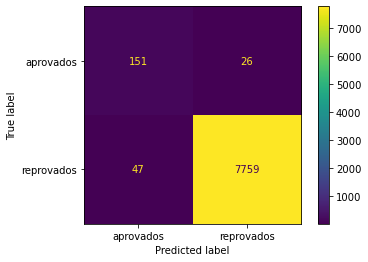

In [42]:
# Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados"

plot_confusion_matrix(clf, X_train, y_train, display_labels=["aprovados", "reprovados"])

In [43]:
# Calcule a acurácia na base de treinamento

accuracy_score(y_train, clf.predict(X_train))

0.9908555680821747

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [44]:
# Classifique a base de teste de acordo com a árvore que você treinou no item 2

previsao_teste = clf.predict(X_test)
previsao_teste

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

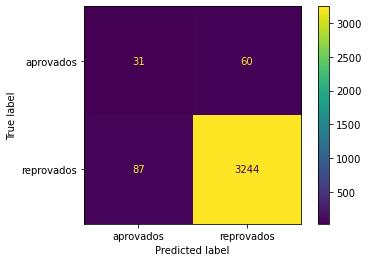

In [45]:
# Produza a visualização da matriz de confusão para a base de teste

plot_confusion_matrix(clf, X_test, y_test, display_labels=["aprovados", "reprovados"])

In [46]:
# Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento

accuracy_score(y_test, clf.predict(X_test))

0.9570426651081239

In [47]:
# Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação

clf_2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_2 = clf_2.fit(X_train, y_train)

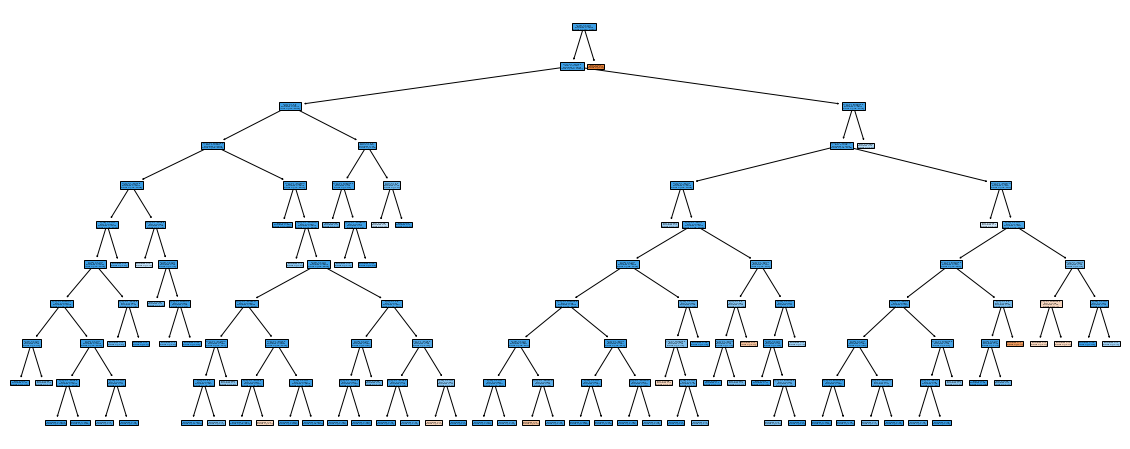

In [48]:
plt.figure(figsize=(20, 8))
plot_tree(clf_2,
          filled=True);   

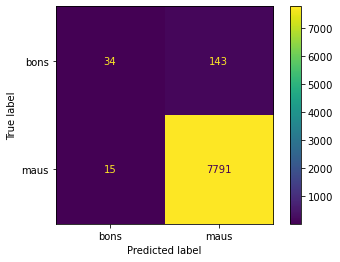

In [49]:
# Avalie a matriz de classificação

plot_confusion_matrix(clf_2, X_train, y_train, display_labels=["bons", "maus"])

In [50]:
# Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

predicao_maus = 143 + 7791
predicao_total = 34 + 15 + 143 + 7791
proporcao_predicao_maus = predicao_maus/predicao_total
proporcao_predicao_maus

0.993861956657898

In [51]:
# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

ocorrencia_bons = 34 + 143
predicao_total = 34 + 15 + 143 + 7791
acuracia_bons = ocorrencia_bons/predicao_total
acuracia_bons

0.022172115745960164